<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/assets/ML_Artifacts/Airbnb_Project/Essex_group_project_01_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Airbnb Data Analysis**

New York City is cracking down on Airbnbs. The city believes that Airbnb is reducing the available housing stock and making housing less affordable. At the heart of the debate are short-term/ whole apartment rental units.

In our report, we analyze the room type distribution of units in New York City,  whether certain NYC neighborhood groups are adversely affected than others, and how unit prices are clustered.

*Group #1: Dominika Pietrzak, Himakara Pieris and Daisy Ipatzi Bello*

### Set up and imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap
!pip install folium # for map visualizations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset source -> https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
# Hima Drive
df = pd.read_csv('/content/drive/MyDrive/Essex (1)/Machine Learning/data/airbnb-kaggle/AB_NYC_2019.csv')

In [ ]:
#Dom
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
#Daisy
df = pd.read_csv('/content/drive/My Drive/Essex/Module_ML/AB_NYC_2019.csv')

# **Exploratary Data Analysis**

#### First look

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Interpretation**:The dataset contains 48,895 entries and 16 columns

#### Available columns

In [ ]:
col_info = df.dtypes
print(col_info)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object



**Interpretation**:Understanding the data types is crucial for data processing and analysis, as it informs how we can manipulate and analyze each column:

*   **id:**This column contains integer values: The int64 data type suggests these are 64-bit integers, which is a standard numeric type for representing whole numbers.
*   **name, host_name, neighbourhood_group, neighbourhood, room_type, last_review:** These columns are likely strings or mixed types.
*   **latitude, longitude, reviews_per_month**: These columns contain floating-point numbers, which are numbers with decimal points.
*   **host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365**: Similar to the id column, these columns also contain integer values.  

#### Data summary

In [ ]:
df.drop_na().describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Interpretation**: Understanding the data types is crucial for data processing and analysis, as it informs how we can manipulate and analyze each column.

*   count: For most columns, there are 48,895 entries, except for reviews_per_month which has 38,843 entries, indicating some missing values in this column.

*   mean: This row shows the average (mean) value for each column. For instance, the average price is approximately $152.72, the average number of reviews per listing is about 23.27 and the revies per month is about 1.

*   std: It indicates the spread or variability of the data in each column. A high standard deviation means the data points are spread out over a wide range of values. For example, the standard deviation for the price is around $240.15, suggesting significant variation in pricing. In contrast, the small standard deviation in the 'latitude' column indicates that the latitude values of the listings are quite close to each other; they don't vary much. Most listings are clustered around a similar geographic area, as evidenced by their similar latitude values. This lack of wide variation in latitudes suggests a more geographically concentrated set of listings.

*  min: Minimum value in each column. For example, the minimum price is $0, the minimum number of reviews is 0 and the minimum of availavility 365 is 0.

*  25%: First Quartile, it indicates that 25% of the data in each column falls below this number. For instance, 25% of listings have a price of $69 or less.

*  50%: Minimum value in each column. For example, the minimum price is $0, the minimum number of reviews is 0 and the minimum of availavility 365 is 0.

*  75%: Thirst quartile, it shows that 75% of the data falls below this number. For instance, 75% of the listings have a price of $175 or less.

*  max: This indicates the maximum value in each column. For example, the maximum price listed is $10,000, and the maximum number of reviews is 629.

**Overall** : The average price of a listing is around 153USD, but there is a lot of variation in prices. Some listings are very cheap or even free (as per this data), while others are extremely expensive, going up to $10,000.
The high standard deviation indicates that prices are spread out over a wide range, and not clustered around the average. This suggests that the dataset includes a diverse range of listings, from budget options to luxury accommodations. The majority of listings, however, are on the lower end of the price scale, as indicated by the median and quartile values.

#### Missing values


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Analyzing Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
print("Missing Values Analysis:\n", missing_data)

Missing Values Analysis:
                    Missing Values  Percentage
last_review                 10052   20.558339
reviews_per_month           10052   20.558339
host_name                      21    0.042949
name                           16    0.032723


**Interpretation**: Handling missing values is an important step. Depending on the nature and extent of the missing data, we might choose to fill in these gaps with estimated values (like the mean or median), remove the entries with missing values, or use more complex imputation methods.
For a significant proportion of missing data (like in last_review and reviews_per_month), it's crucial to consider how this might impact our analysis and what methods are appropriate for dealing with such missing data. For columns with very few missing values (like host_name and name), it's often safe to either fill in these gaps with estimated values or simply remove those few entries, depending on our analysis needs.
**However, our analysis should not be greatly impacted by null values as the variables with high null percentages, such as reviews and host details will not be necessary in working out room type distribution and price clustering.**

In [ ]:
# df[df["price"] > 500].count()
df[df["availability_365"] < 30].count()

id                                22699
name                              22687
host_id                           22699
host_name                         22685
neighbourhood_group               22699
neighbourhood                     22699
latitude                          22699
longitude                         22699
room_type                         22699
price                             22699
minimum_nights                    22699
number_of_reviews                 22699
last_review                       17154
reviews_per_month                 17154
calculated_host_listings_count    22699
availability_365                  22699
dtype: int64

#### Outliers




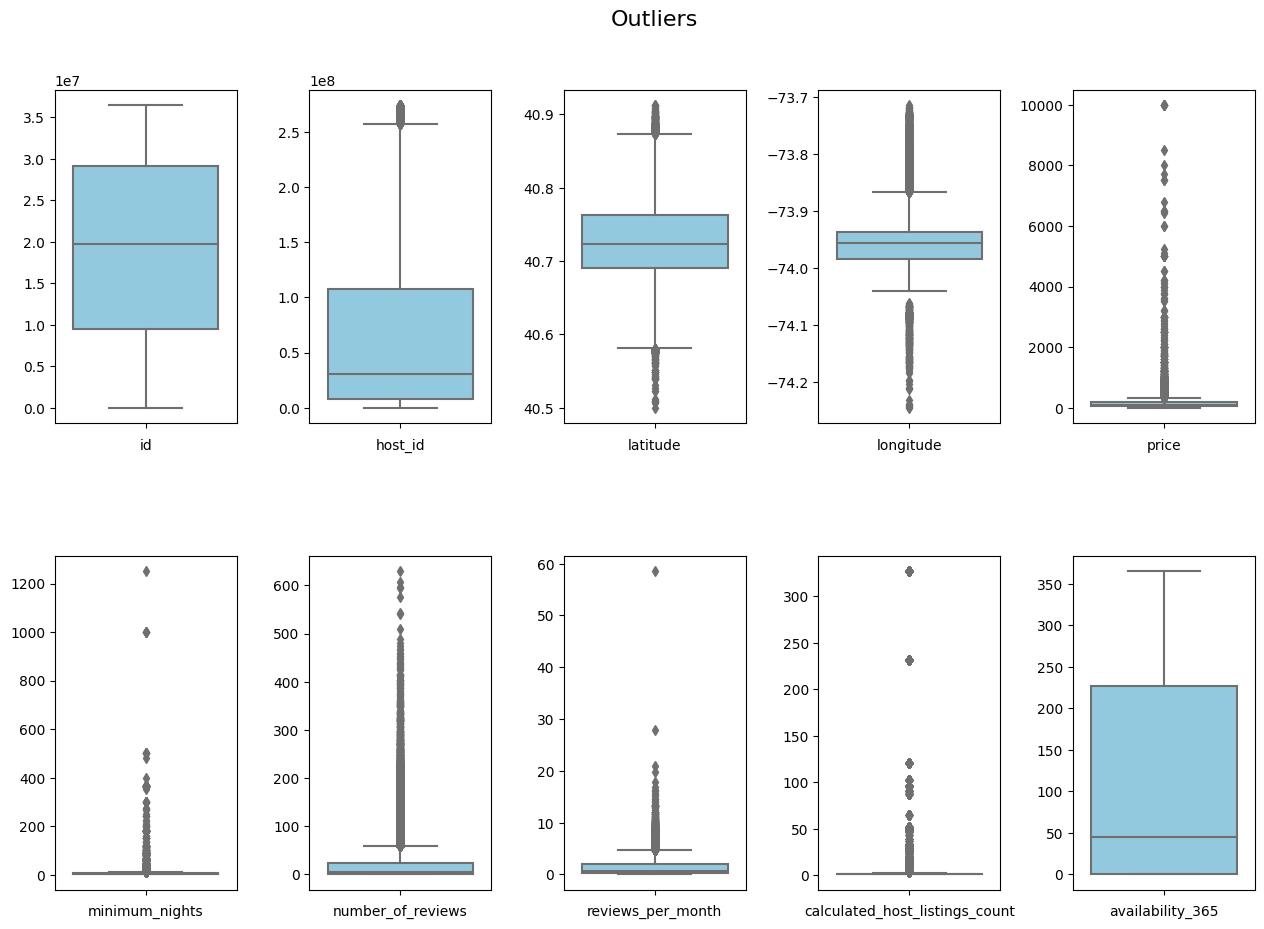

In [ ]:
# List of numerical variables you want to plot
numerical_vars = ['id','host_id','latitude', 'longitude', 'price', 'minimum_nights',
                  'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']

# Initialise figure with 2 rows and 5 columns for subplots
fig, ax = plt.subplots(2, 5, figsize=(15, 10))  # Adjusted figsize for better layout

index = 0
for i in range(2):
    for j in range(5):
        if index < len(numerical_vars):
            # Draw boxplot with a specific color
            sns.boxplot(data=df[numerical_vars[index]], ax=ax[i][j], color='skyblue')  # Change 'skyblue' to your desired color
            ax[i][j].set_xlabel(numerical_vars[index])
            ax[i][j].set_xticklabels([])
            index += 1
        else:
            # Hide empty subplots
            ax[i][j].set_visible(False)

# Set the main title of the figure
fig.suptitle('Outliers', fontsize=16)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


**Interpretation**: A boxplot displays the median (the middle value), the interquartile range (IQR, the range between the 25th and 75th percentiles, represented by the box), and the "whiskers" which typically extend to 1.5 * IQR above the 75th percentile and below the 25th percentile. Points outside this range are often considered outliers.
Indeed, there is evidence of outliers within the price, minimum_nights, number_of_reviews (and thus, reviews_per_month), and calculated_host_listings_count variables.

#### Correlation

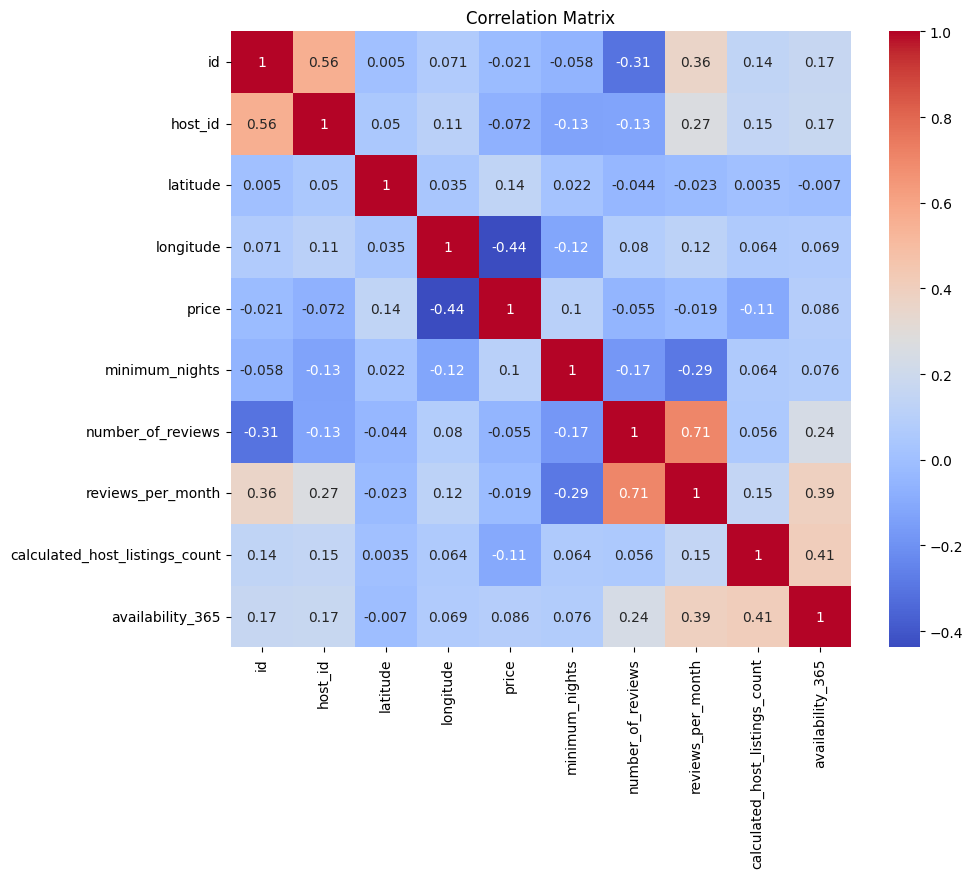

In [ ]:
# List of numerical variables

numerical_vars = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

numeric_df = df[[*numerical_vars]]
correlation_matrix = numeric_df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



**Interpretation**:

The Spearman correlation method assesses how well the relationship between two variables can be described. Here are a few reasons why you might choose to use Spearman's correlation method. Spearman's correlation does not assume that the data is normally distributed. This makes it a good choice for data that is not normally distributed or when the sample size is small.

Price shows only a weak positive correlation with both minimum_nights (0.04) and calculated_host_listings_count (0.06). Weak negative correlation between price and number_of_reviews (-.05) is observed. Price doesn’t really correlate significantly with reviews_per_month or availability_365.
When it comes to number_of_reviews, there’s a moderate positive link with the reviews_per_month (0.55), it has a weak negative correlation with minimum_nights (-0.08)  and calculated_host_listings_count (-0.07).
Availability_365 is most strongly linked to calculated_host_listings_count (0.23) and reviews_per_month (0.19), indicating that listings with more availability throughout the year are likely to have more reviews per month and are often part of hosts with multiple listings.
These insights reveal some interesting patterns in how pricing, reviews, and availability interact with other factors in the listings. It's key to remember, though, that correlation doesn't necessarily mean one causes the other, and these relationships could be influenced by many other factors not shown in the data.

# **Neighbourhoods and counts**

#### Room types and counts

In [ ]:
room_type_counts = df['room_type'].value_counts()
room_type_counts

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

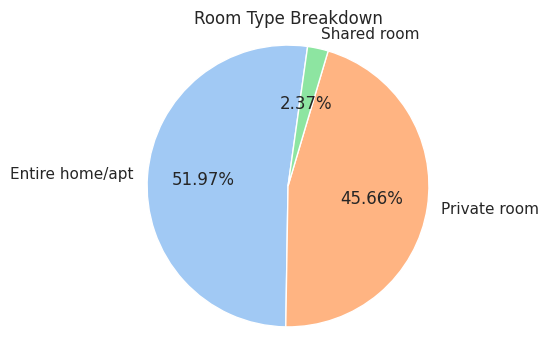

In [ ]:
# @title
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.set_palette("pastel")
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.2f%%', startangle=82)
plt.title('Room Type Breakdown')
plt.axis('equal')
plt.show()

**Interpretation**: The prevalence of "Entire home/apt" listings indicates a strong market for full property rentals. The smaller number of "Shared room" listings might reflect a more niche market or less demand for such types of accommodation.

#### Room type breakdown by neighborhood group

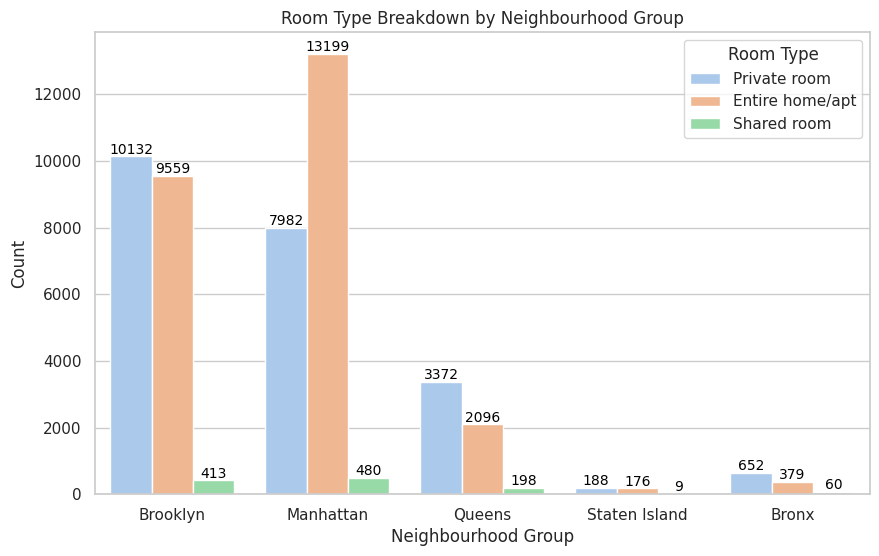

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


In [ ]:
sns.set(style="whitegrid")

# Initialize a new figure
plt.figure(figsize=(10, 6))

# Create a count plot
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='pastel')

# Set labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Room Type Breakdown by Neighbourhood Group')

# Add a legend
plt.legend(title='Room Type')

# Annotate with the count on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

#Output Table:
counts = df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='counts')
pivot_table = counts.pivot(index='neighbourhood_group', columns='room_type', values='counts').fillna(0)
print(pivot_table)


**Interpretation**: Each neighborhood has its unique profile in terms of the types of accommodations available. For example, The Bronx has a higher number of private rooms compared to entire homes/apartments and shared rooms; Brooklyn has a fairly close number of entire homes/apartments and private rooms, but private rooms are slightly more prevalent. Shared rooms are much less common; Manhattan has a significantly higher number of entire homes/apartments compared to private rooms and shared rooms, indicating a preference or availability for renting out entire spaces and, Staten Island has a roughly equal number of entire homes/apartments and private rooms, with shared rooms being quite rare.

#### Heatmap of Average Price

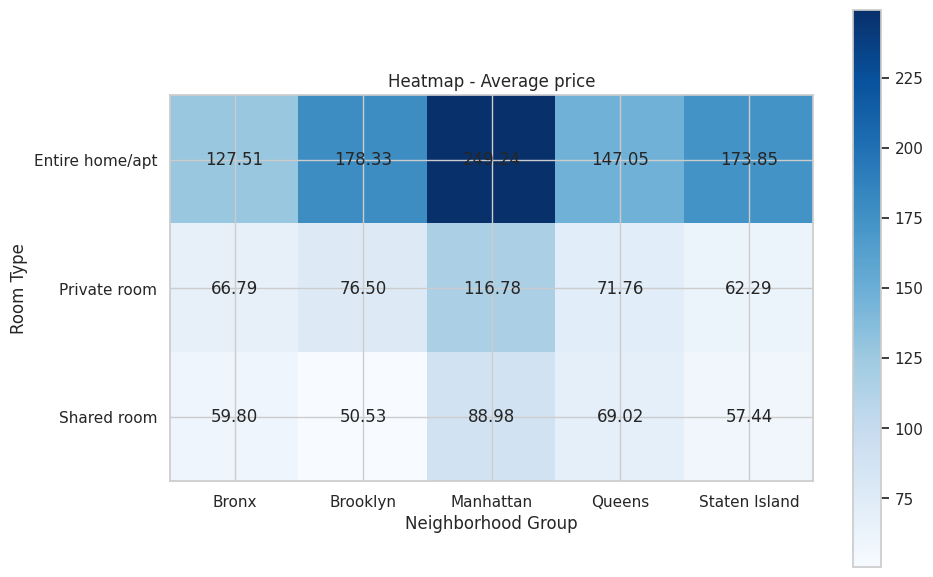

In [ ]:
# Create a pivot table or crosstab
heatmap = pd.crosstab(index=df['room_type'], columns=df['neighbourhood_group'], values=df['price'], aggfunc='mean')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='Blues', interpolation='nearest')
plt.title('Heatmap - Average price')
plt.xlabel('Neighborhood Group')
plt.ylabel('Room Type')
plt.colorbar()

# Display the values in the cells
for i in range(len(heatmap.index)):
  for j in range(len(heatmap.columns)):
    plt.text(j, i, f'{heatmap.iloc[i, j]:.2f}', ha='center', va='center', fontsize=12)

plt.xticks(range(len(heatmap.columns)), heatmap.columns)
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.tight_layout()

# Show the plot
plt.show()

**Interpretation**: Highest average price is observed for entire homes in Manhattan

#### Utilization distribution across Manhattan (using reviews as proxy)

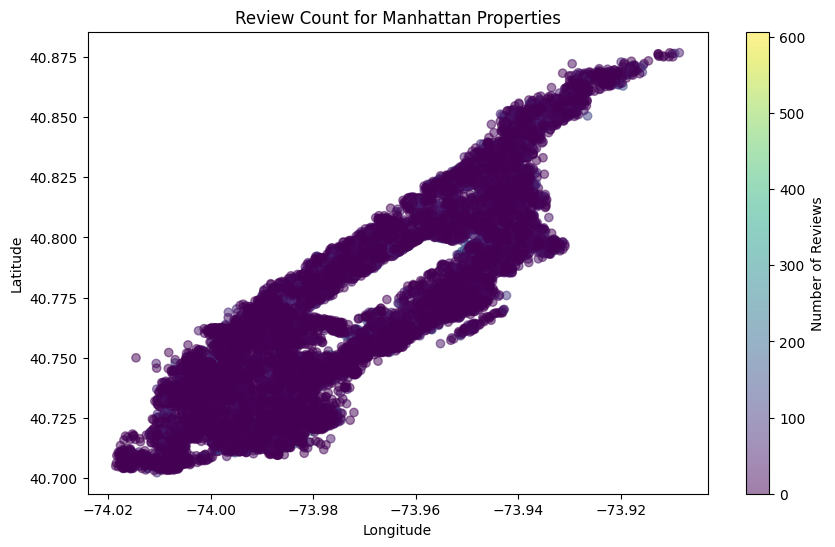

In [ ]:
manhattan_data = df[df['neighbourhood_group'] == 'Manhattan']

plt.figure(figsize=(10, 6))
plt.scatter(manhattan_data['longitude'], manhattan_data['latitude'], c=manhattan_data['number_of_reviews'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Number of Reviews')
plt.title('Review Count for Manhattan Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

map_manhattan = folium.Map(location=[40.7831, -73.9712], zoom_start=13)

for lat, lon, num_reviews in zip(manhattan_data['latitude'], manhattan_data['longitude'], manhattan_data['number_of_reviews']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Number of Reviews: {num_reviews}'
    ).add_to(map_manhattan)

map_manhattan.save('manhattan_map.html')

hard to tell anything from this graph - perhaps not that useful for our analysis? -Dom

#### Checking if Data is Normalized


We will check first, the histograms distribution:

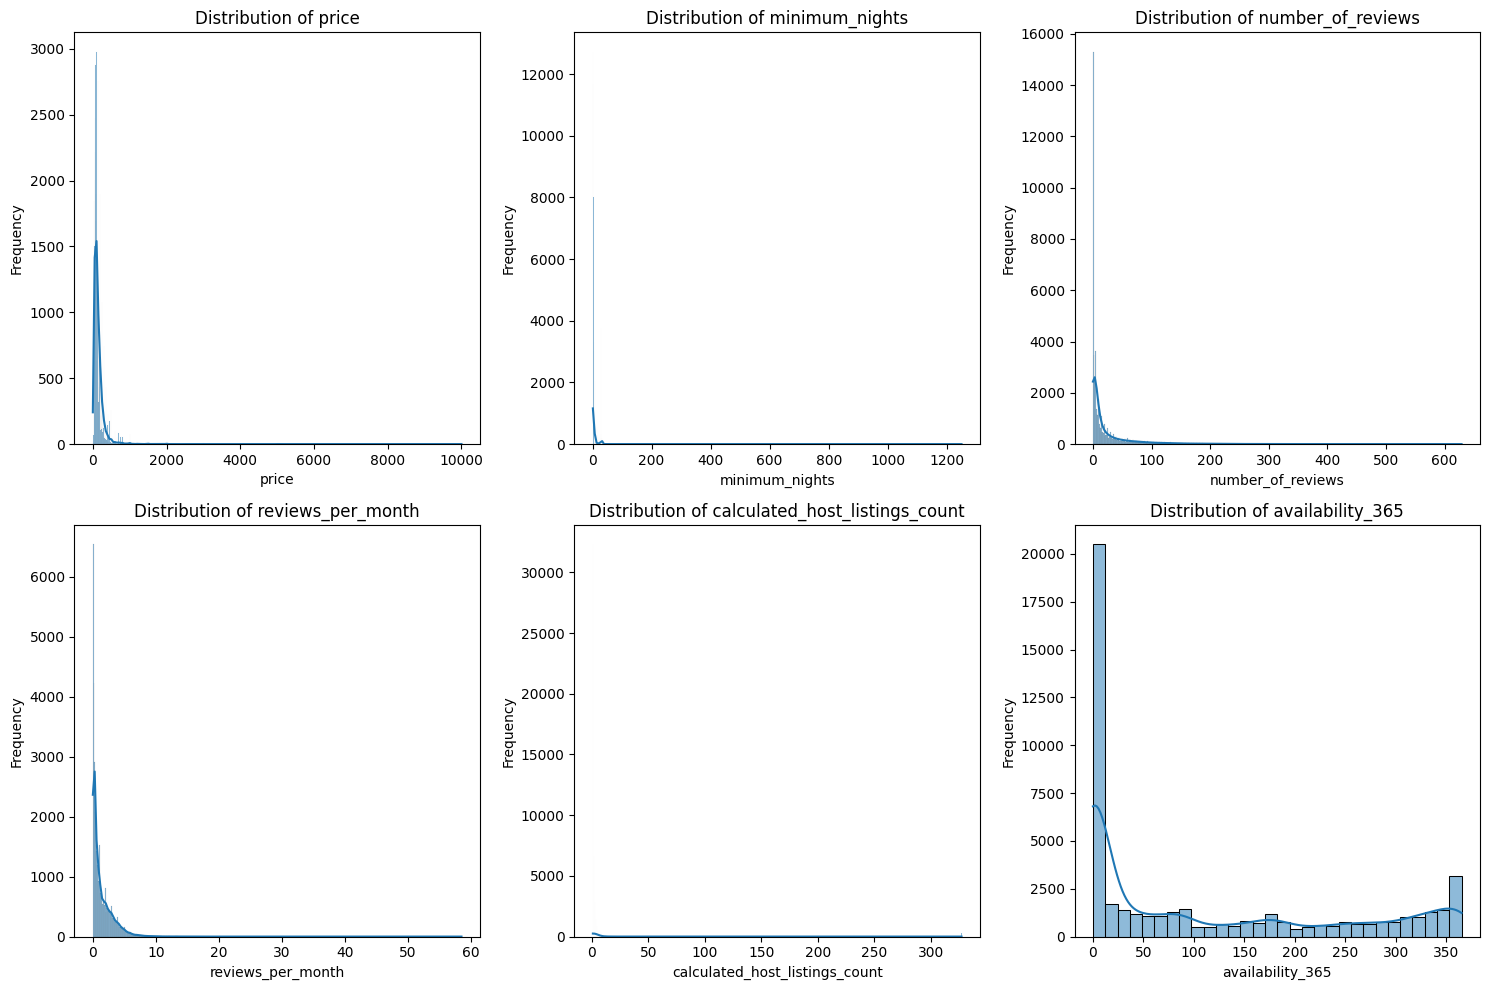

In [ ]:
# List of numeric features you want to plot
numeric_features = ['price', 'minimum_nights', 'number_of_reviews',
                    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Setting up the figure
plt.figure(figsize=(15, 10))

# Looping through the numeric features to create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Adjust the grid dimensions (2, 3) as needed
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpretation**:

*   Price: Highly skewed to the right, with most values clustered at the lower end.
*   Minimum Nights: Also right-skewed, indicating that most listings require only a few nights stay, but some require significantly more.
*   Number of Reviews: Right-skewed, suggesting most listings have a few reviews, while a small number have many.
*   Reviews per Month: Right-skewed, indicating most listings have a few reviews per month.
*   Calculated Host Listings Count: Right-skewed, showing most hosts have a few listings, while a few hosts have many.
*   Availability 365: This feature shows a more varied distribution, but still not a normal distribution.

From these observations, we can conclude that the data is not normalized. The numeric features neither share a common scale nor do they follow a normal distribution.

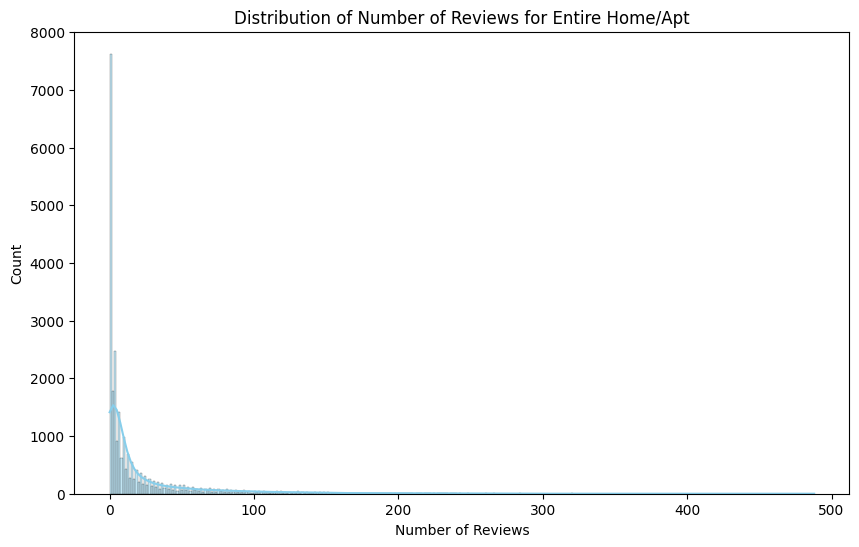

Shapiro-Wilk Test Statistic: 0.5782724618911743
P-value: 0.0
The data does not appear to be normally distributed (p <= 0.05)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
entire_home_data = df[df['room_type'] == 'Entire home/apt']

plt.figure(figsize=(10, 6))
sns.histplot(entire_home_data['number_of_reviews'], kde=True, color='skyblue')

plt.title('Distribution of Number of Reviews for Entire Home/Apt')
plt.xlabel('Number of Reviews')

plt.show()

# Shapiro-Wilk normality test
stat, p_value = shapiro(entire_home_data['number_of_reviews'])

print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('The data appears to be normally distributed (p > 0.05)')
else:
    print('The data does not appear to be normally distributed (p <= 0.05)')

In [ ]:
import scipy.stats as stats
price_data = df['price']

# Performing the Shapiro-Wilk test
shapiro_test = stats.shapiro(price_data)

# Print the test result
print("Shapiro-Wilk Test Statistic:", shapiro_test[0])
print("P-value:", shapiro_test[1])

Shapiro-Wilk Test Statistic: 0.3004608750343323
P-value: 0.0


**Interpretation**:

Shapiro-Wilk Test:

-Null Hypothesis (H0): The data is normally distributed.

-Alternative Hypothesis (H1): The data is not normally distributed.

A low p-value (typically less than 0.05) suggests that we can reject the null hypothesis and conclude that the data is not normally distributed, which is our case.

#### Distribution of units that are violating the new regulations

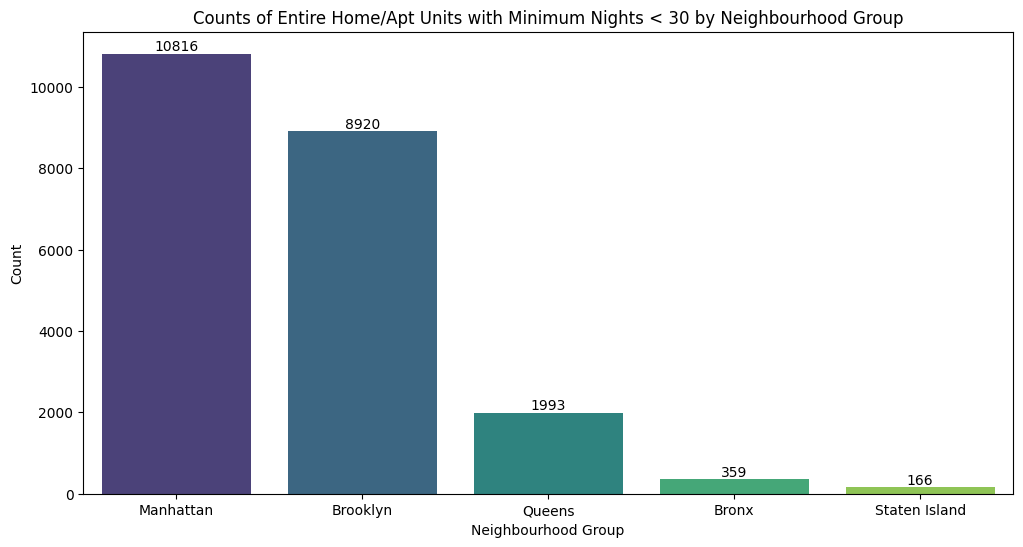

  neighbourhood_group  violating_regulations_count  total_count
2           Manhattan                        10816        21661
1            Brooklyn                         8920        20104
3              Queens                         1993         5666
0               Bronx                          359         1091
4       Staten Island                          166          373


In [ ]:
filtered_data = df[(df['room_type'] == 'Entire home/apt') & (df['minimum_nights'] < 30)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='neighbourhood_group', data=filtered_data, palette='viridis')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Counts of Entire Home/Apt Units with Minimum Nights < 30 by Neighbourhood Group')

# Adding the counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#Building a small table with the filtered data and non-filtered data

# Grouping by neighbourhood_group and counting the listings for filtered data
violating_regulations = df[(df['room_type'] == 'Entire home/apt') & (df['minimum_nights'] < 30)]
grouped_violating_regulations = violating_regulations.groupby('neighbourhood_group').size().reset_index(name='violating_regulations_count')
grouped_all_data = df.groupby('neighbourhood_group').size().reset_index(name='total_count')

# Merging the filtered and non-filtered data
merged_data = pd.merge(grouped_violating_regulations, grouped_all_data, on='neighbourhood_group')
# Sorting the data for better visualization (optional)
merged_data = merged_data.sort_values(by='violating_regulations_count', ascending=False)
# Displaying the table
print(merged_data)

**Interpretation**: Overall, this table provides a comparative view of how different neighbourhoods stack up in terms of listings violating certain regulations. Manhattan and Brooklyn have the highest numbers of such listings, both in absolute terms and as a proportion of their total listings. The data can be useful for understanding the distribution of regulatory compliance across different areas, which could be crucial for city planning, policy-making, or for platforms managing these listings.

## Cost of Losing Listings Violating Regulations

In [ ]:
filtered_data = df[(df['room_type'] == 'Entire home/apt') & (df['minimum_nights'] < 30)].copy()

# Calculate the 'airbnb_revenue' for the copied filtered data
filtered_data['airbnb_revenue'] = ((filtered_data['price'] * 0.15) * (filtered_data['availability_365'] * 0.5))

# Sum up the 'airbnb_revenue' column
total_revenue = filtered_data['airbnb_revenue'].sum()

print(total_revenue)

39756710.1


Airbnb takes a cut of ~15% per booking.
https://www.airbnb.co.uk/help/article/1857

NYC sees about a 50% occupancy rate for Airbnbs.
https://airbtics.com/airbnb-occupancy-rates-in-new-york-city/

The ban of illegal listings will cost the company around $31596128.1 in revenue

In [ ]:
smallAvailabilityRooms = filtered_data['availability_365'].between(0, 60).sum()
(smallAvailabilityRooms / len(filtered_data)) * 100

58.497348791228546

Units with an availability of less than 60 days (2months) per year most likely belong to individuals who use Airbnb as an extra source of income when away on holiday or visiting family.

These individuals will be very unlikely to update their minimum night stay to exceed 30 days and so, are likely to come off the market completley.

61.4% of units are such units.

In [ ]:
smallAvailabilityRoomsDf = filtered_data[(filtered_data['availability_365'] >= 0) & (filtered_data['availability_365'] <= 60)]

smallAvailabilityRoomsDf['airbnb_revenue'].sum()

1409681.55

These units represent $1109765.85 of revenue that Airbnb will most likely not be able to recover.

#### Neighbourhoods plotted for longitude and latitud
For comparison with price clusters below

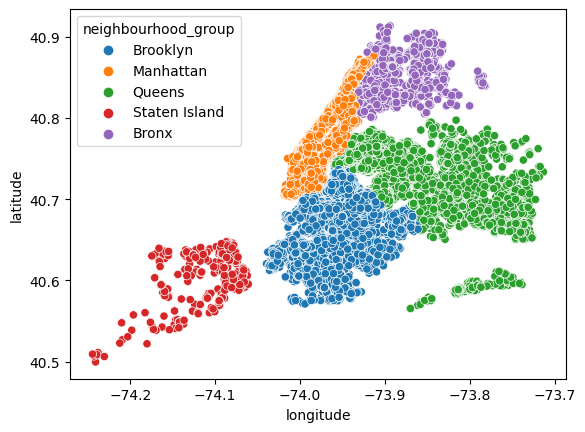

In [ ]:
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

# **Data Preprocessing and Preparing Data For Clustering**



*   Feature Selection: We'll select relevant features for clustering. In this case, 'latitude', 'longitude', and 'price' are the most relevant features as they represent the location and cost of the listings.

*   Scaling: Clustering algorithms like K-means are sensitive to the scale of the data. Since 'price' is on a different scale compared to 'latitude' and 'longitude', we need to normalize these features to ensure that each feature contributes equally to the distance calculations.

*   Choosing the Number of Clusters: We need to determine the optimal number of
clusters. This is often done using methods like the Elbow Method, which involves running the clustering algorithm for different numbers of clusters and selecting the number that gives the best balance between the compactness of the clusters and the separation between them.

In [ ]:
# Handling missing values
new_df = df.copy()

new_df['name'].fillna('Unknown', inplace=True)
new_df['host_name'].fillna('Unknown', inplace=True)
new_df['reviews_per_month'].fillna(0, inplace=True)

#Before
Before=df.isnull().sum()
#After
After=new_df.isnull().sum()


# Printing the summaries
print("Before:\n", Before)
print("\nAfter:\n", After)

Before:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

After:
 id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type

**Interpretation**:

**Handling missing values**
Missing data can lead to inaccurate analyses and biased results.
For the name and host_name columns, missing values were filled with "Unknown".
For the reviews_per_month column, were filled with 0. This choice reflects the reality that no reviews correlate to a 0 value in this field.

**Handling Outliers**
In the context of this analysis, there are extremely high prices, which statistically might be considered as outliers. However, given the nature of our business question, we will mantain them, assuming they could be luxury listings, they are definetely relevant to our study.

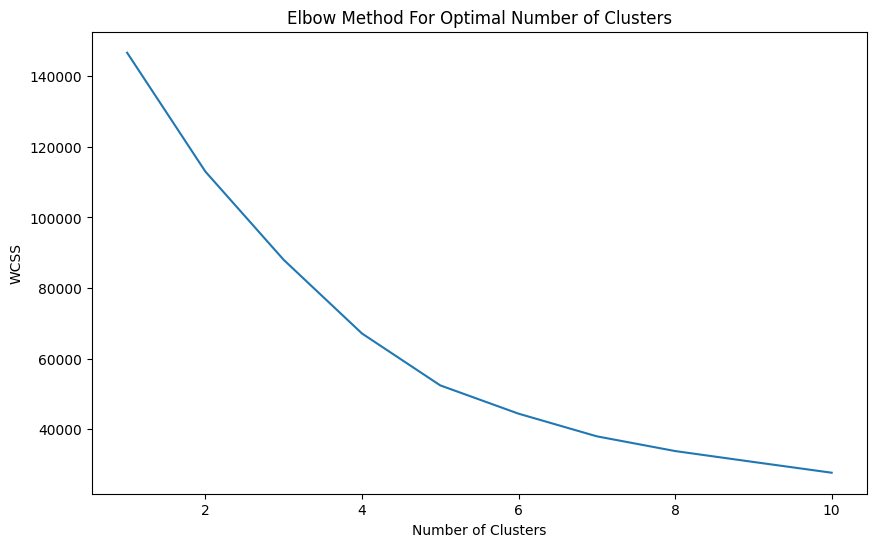

In [ ]:
# Normalization
clustering_data = new_df[['latitude', 'longitude', 'price']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Interpretation**

**Normalization** is crucial, when data features have different units or scales, as it is in this case with geographical coordinates (latitude and longitude) and price. Without normalization, the clustering algorithm might improperly weigh the features. For instance, the price values, which are typically much larger numerically than latitude and longitude values, could dominate the clustering process, leading to suboptimal clustering results.

In this analysis, we used the StandardScaler from the scikit-learn library for normalization, also known as standardization. This method was chosen because it effectively rescales each feature to have a mean of 0 and a standard deviation of 1. This standardization is crucial when the features in the dataset are on different scales or units, as was the case with latitude, longitude, and price in the housing dataset.

# **Clustering**

#### Price clusters across NYC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


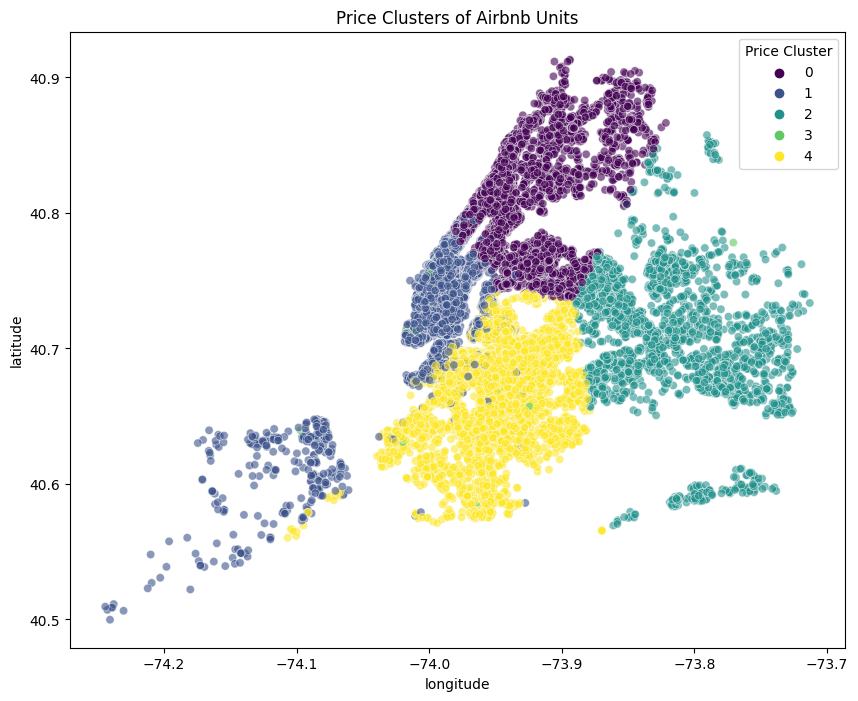

In [ ]:
cluster_data = new_df[['latitude', 'longitude', 'price']]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
new_df ['price_cluster'] = kmeans.fit_predict(cluster_data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price_cluster', palette='viridis', data=new_df, alpha=0.6)

plt.legend(title='Price Cluster', bbox_to_anchor=(1, 1))

plt.title('Price Clusters of Airbnb Units')
plt.show()


# show on a map
map_center = [new_df['latitude'].mean(), new_df['longitude'].mean()]
map_clusters = folium.Map(location=map_center, zoom_start=12)

for index, row in new_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue' if row['price_cluster'] == 0 else 'green' if row['price_cluster'] == 1 else 'orange' if row['price_cluster'] == 2 else 'red',
        fill=True,
        fill_color='blue' if row['price_cluster'] == 0 else 'green' if row['price_cluster'] == 1 else 'orange' if row['price_cluster'] == 2 else 'red',
        fill_opacity=0.6,
        popup=f'Price Cluster: {row["price_cluster"]}'
    ).add_to(map_clusters)

map_clusters.save('price_clusters_map.html')

map_clusters


### Analyzing the Clusters

In [ ]:
# Adding the cluster labels to our data
cluster_labels = kmeans.fit_predict(scaled_data)
new_df['cluster'] = cluster_labels

# Analyzing the clusters
cluster_summary = new_df.groupby('cluster').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'price_cluster': ['mean', 'count']
}).reset_index()

cluster_summary.columns = ['Cluster', 'Latitude', 'Longitude', 'Average Price', 'Number of Listings']
cluster_summary.sort_values(by='Average Price', ascending=False)

,Cluster,Latitude,Longitude,Average Price,Number of Listings
4,4,40.684226,-73.948204,4.0,18839
3,3,40.736699,-73.975251,3.0,79
2,2,40.711413,-73.821929,2.0,2716
1,1,40.733255,-73.989818,1.0,15706
0,0,40.800080,-73.937916,0.0,11555


**Interpretation**:


*   Cluster number 3: It represents a high-priced area with an average price of approximately $4435.08, which is significantly higher than the other clusters. It has the fewest listings so then, we are assuming these are luxury rooms. The coordinates point to a location in Midtown Manhattan, a region known for its high real estate value and luxury accommodations
*   Cluster number 1: This cluster has a moderate average price and the highest number of listings. The coordinates suggest it covers a part of Lower Manhattan, which includes diverse neighborhoods, perhaps explaining the moderate price and high number of listings.
*   Cluster number 0: Is in the upper part of Manhattan. It has a relatively low average price with a significant number of listings, indicating a more affordable area.
*   Cluster number 4: This cluster, with the lowest average price, is located in Brooklyn (areas like Bedford-Stuyvesant or Crown Heights could be included). It has a very high number of listings, suggesting a popular area for more budget-friendly accommodations.
*   Cluster number 2:  Also elatively affordable, it has fewer listings than Clusters 0 and 4, suggesting a less dense but still affordable area.



In [ ]:
#Export Data
new_df.to_csv('/content/drive/My Drive/Essex/Module_ML/output_filename.csv', index=False)

# **Confirmatory Data Analysis**

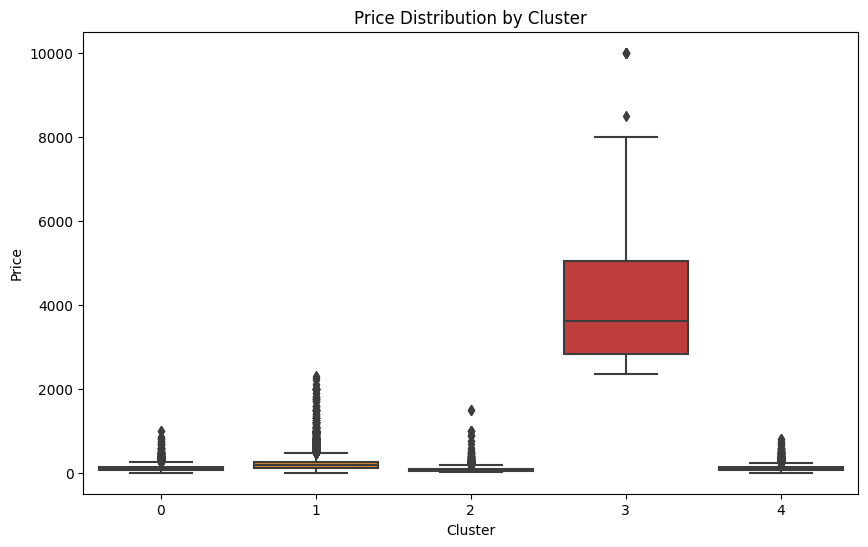

           count         mean          std     min     25%     50%     75%  \
cluster                                                                      
0        11555.0   112.236694    75.113305     0.0    65.0    95.0   140.0   
1        15706.0   232.632815   202.433698     0.0   121.0   183.0   262.0   
2         2716.0    94.858247    92.529333    10.0    50.0    69.0   100.0   
3           79.0  4435.075949  2221.049843  2350.0  2825.0  3613.0  5050.0   
4        18839.0   101.313552    63.625085     0.0    58.0    85.0   128.5   

             max  
cluster           
0         1000.0  
1         2300.0  
2         1500.0  
3        10000.0  
4          800.0  


In [ ]:
#Price Distribution by Cluster

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='price', data=new_df)
plt.title('Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

#Table
price_cluster_summary = new_df.groupby('cluster')['price'].describe()
print(price_cluster_summary)

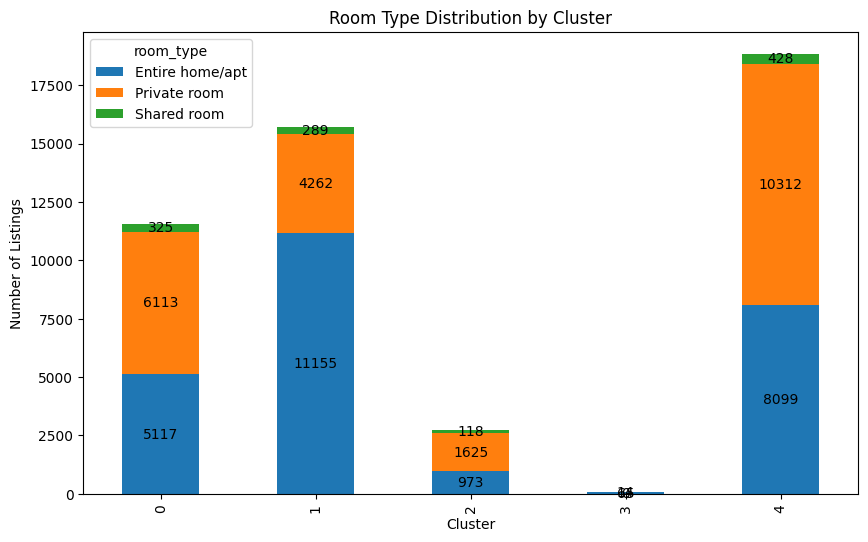

room_type  Entire home/apt  Private room  Shared room
cluster                                              
0                     5117          6113          325
1                    11155          4262          289
2                      973          1625          118
3                       65            14            0
4                     8099         10312          428


In [ ]:
#Room Type Distribution in Clusters
room_type_distribution = pd.crosstab(new_df['cluster'], new_df['room_type'])
ax = room_type_distribution.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Room Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Listings')

# Adding counts above each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f}'.format(height),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()


#Table
room_type_distribution = pd.crosstab(new_df['cluster'], new_df['room_type'])

# Display the summary table
print(room_type_distribution)

**Interpretation:**

Price Analysis: Clusters 0, 2, and 4 represent more budget-friendly options, Cluster 1 is mid-range, and Cluster 3 is luxury.

Room Type Analysis: Private rooms dominate in Clusters 0 and 2, entire homes/apartments are most common in Cluster 1, and Cluster 3 is almost exclusively entire homes/apartments, which is consistent with its luxury status. Cluster 4 has a balanced mix of private rooms and entire homes/apartments.

# **Few conclusions about Clustering Analysis**

The clustering analysis revealed distinct groups based on location (latitude
and longitude) and price. This indicates a clear geographical pattern in the pricing of listings.
:
Certain clusters, particularly those with higher average prices, are likely located in more central or sought-after areas, such as parts of Manhattan. These areas might represent less affordable housing options but potentially more lucrative for hosts or investors and clusters with lower average prices might be in more peripheral areas.

Areas with a high concentration of listings could indicate a robust rental market, whereas sparsely populated areas on the map might indicate less competition but potentially lower demand.

The clustering has effectively segmented the market into different categories, ranging from luxury or high-priced listings to more budget-friendly options. This segmentation can be crucial for stakeholders looking to target specific market segments.

For property owners and real estate investors, understanding these clusters can help in making informed decisions about where to invest or what pricing strategies to adopt. For renters or buyers, this analysis can guide them to neighborhoods that suit their budget and needs.

From a policy perspective, these insights can assist in urban planning and housing stock strategies. Identifying areas of high price concentration might signal a need for more affordable housing initiatives.